In [40]:
from typing import Callable
import numpy as np
import matplotlib.pyplot as plt

In [41]:
def integrand(x: float) -> float:
    """Function returning the value of the integrand function
    In this example f(x) = x^2 * exp(x)

    Args:
        x (float): The dependent variable of f(x)

    Returns:
        float: Integrand function value
    """
    f = x**2 * np.exp(x)
    return f

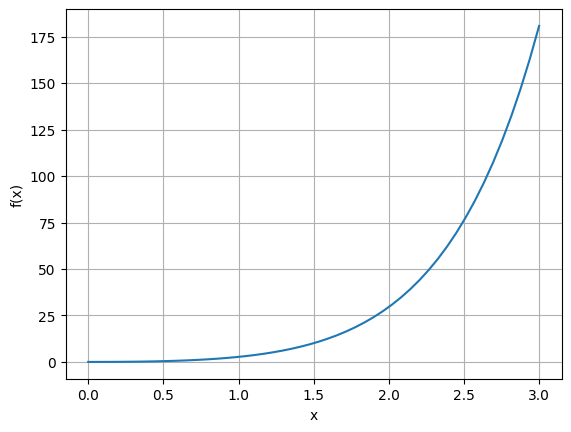

In [42]:
# Let's have a look at the function to be integrated
x_grid = np.linspace(0,3)
fig, ax = plt.subplots()
ax.plot(x_grid, integrand(x_grid))
ax.set_xlabel("x")
ax.set_ylabel("f(x)")
ax.grid()

In [43]:
# Define discretization specs for numerical integration
a = 0                                   # left boundary
b = 1                                   # right boundary
n_points = 30                           # number of grid points

In [44]:
# Rectangles method for numerical integration (left corner)
def rectangles_left(func: Callable, a: float, b: float, N: int):
    """Function implementing a rectangle method for numerical integration

    Args:
        func (Callable): A function to be integrated
        a (float): Left domain boundary
        b (float): Right domain boundary
        N (int): Number of points for the domain discretization

    Returns:
        float: The value of the integral defined in the domain [a,b]
    """
    integral = 0
    x_edges = np.linspace(a, b, N)                  # define the discretization grid
    h = x_edges[1] - x_edges[0]                     # step size
    for i in range(N - 1):
        left_corner = x_edges[i]                    # left corner
        integral += h * (func(left_corner))
    return integral

In [45]:
# Compute the integral value using rectangles method (right corner)
integral_rl = rectangles_left(func=integrand, a=a, b=b, N=n_points) 

print(f"The result of the integral defined in [{a},{b}] is {integral_rl}")

The result of the integral defined in [0,1] is 0.6722228932594023


In [46]:
# Rectangles method for numerical integration (right corner)
def rectangles_right(func: Callable, a: float, b: float, N: int):
    """Function implementing a rectangle method for numerical integration

    Args:
        func (Callable): A function to be integrated
        a (float): Left domain boundary
        b (float): Right domain boundary
        N (int): Number of points for the domain discretization

    Returns:
        float: The value of the integral defined in the domain [a,b]
    """
    integral = 0
    x_edges = np.linspace(a, b, N)                  # define the discretization grid
    h = x_edges[1] - x_edges[0]                     # step size
    for i in range(N - 1):
        right_corner = x_edges[i+1]                    # right corner
        integral += h * (func(right_corner))
    return integral

In [47]:
# Compute the integral value using rectangles method (right corner)
integral_rr = rectangles_right(func=integrand, a=a, b=b, N=n_points) 

print(f"The result of the integral defined in [{a},{b}] is {integral_rr}")

The result of the integral defined in [0,1] is 0.7659567494131625


In [48]:
def composite_trapezoid(func: Callable, a: float, b: float, N: int):
    """Function implementing a trapezoid method for numerical integration

    Args:
        func (Callable): A function to be integrated
        a (float): Left domain boundary
        b (float): Right domain boundary
        N (int): Number of points for the domain discretization

    Returns:
        float: The value of the integral defined in the domain [a,b]
    """
    integral = 0
    x_edges = np.linspace(a, b, N)
    h = x_edges[1] - x_edges[0]         # the step size
    for i in range(N - 1):
        x1 = x_edges[i]                 # left corner
        x2 = x_edges[i + 1]             # right corner
        integral += 0.5 * h * (func(x1) + func(x2))
    return integral

In [49]:
# Compute the integral value using composite trapezoid
integral_tr = composite_trapezoid(func=integrand, a=a, b=b, N=n_points) 

print(f"The result of the integral defined in [{a},{b}] is {integral_tr}")

The result of the integral defined in [0,1] is 0.7190898213362823


## Error Analysis

In [55]:
# Analytical solution in [0, 1]
analytical_integral = np.exp(1) - 2
print(f"Analytical solution: {analytical_integral}")

Analytical solution: 0.7182818284590451


Text(0, 0.5, 'Relative error [%]')

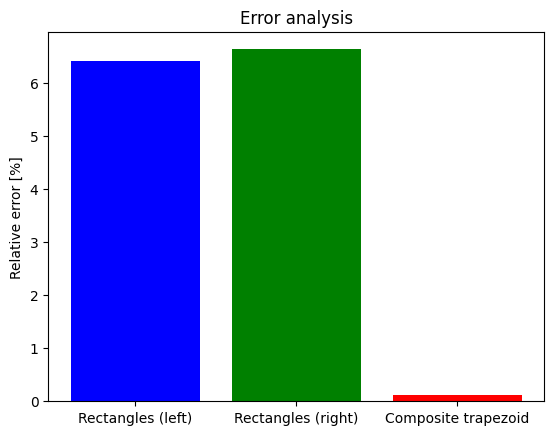

In [51]:
# Bar chart showing the relative error of the numerical integration compared with the analytical solution
fig, ax = plt.subplots()
ax.bar(["Rectangles (left)", "Rectangles (right)", "Composite trapezoid"], 
       [np.abs(analytical_integral-integral_rl)/analytical_integral * 100, 
        np.abs(analytical_integral-integral_rr)/analytical_integral * 100, 
        np.abs(analytical_integral-integral_tr)/analytical_integral * 100], 
        color=['blue', 'green', 'red'])
ax.set_title("Error analysis")
ax.set_ylabel("Relative error [%]")